# Physics 300
# Computational Physics I (Fall 2020)





# Final Project, Numerical Derivatives  

### Introduction

In physics we are tasked with modeling the various behavior and phenomena that is exhibited by the universe. At times we are fortunate enough to have mathematical model that fit the system we are analyzing. When dealing with these mathematical models we can always consider two things: the cumulation of the behavior exhibited and the predicted behavior that is to come. This dynamic of a ‘past’ and ‘future’ parallels with the concepts of an integral and a derivative. Integrals tell us of an accumulated sum of a behavior, while derivatives lay an expectation of what is to come. Finding the derivative of a function can vary from a simple power rule, to more sophisticated endeavors.

$$\frac{df}{dx} = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

### What is a Numerical Derrivative?

The limit definition of a derivative is the basis for derivative calculation. The discrepancy lying in the ‘limit’ portion of the definition. No amount of computational power can represent the mathematical concept of infinitesimals, but we can get close. Instead we consider a simple adjustment to our definition as follows:

$$\frac{df}{dx} \approx \frac{f(x+h)-f(x)}{h} , h<<<0$$

This is typically denoted as the Finite Difference method of numerically calculating a derivative. Programming something like this is quite simple. Consider the function
$$sin(x)$$
as a basis for the following numerical calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi
# Function of choice
def f(x):
    f=np.sin(x)
    return f
# Number of points
N=10000

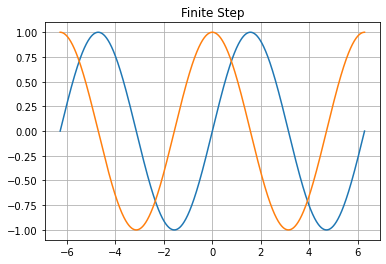

In [2]:
# Finite step
def FinD(x0,h):
    D=f(x0+h)-f(x0)
    D=D/h
    return D

D1=[]
for i in range(N):
    x=np.linspace(-2*pi,2*pi,N)
    d=FinD(x[i],10**(-10))
    D1.append(d)

plt.plot(x,f(x))
plt.plot(x,D1)
plt.grid()
plt.title('Finite Step')
plt.show()

While this proves to be an adequate solution for large scale functions, it is quite a brute force approach to the problem. The accuracy of the calculation is dependent on how small one chooses to make the finite step. Consider the following error analysis of the Finite Step method.

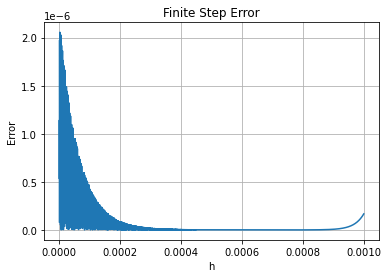

In [3]:
X=pi
G=np.linspace(-3,-10,N)
h=np.linspace(10**(-3),10**(-10),N)
E=[]
for i in range(N):    
    E.append(np.abs(np.cos(X)-FinD(X,10**G[i])))

plt.plot(h,E)
plt.grid()
plt.title('Finite Step Error')
plt.ylabel('Error')
plt.xlabel('h')
plt.show()

It is interesting to note that there is a ‘sweet zone’ for the error. Intuitively one would assume the smaller h is, the smaller the error will be.

### More methods, Complex Step

The Finite Step method is not the only form of calculating numerical derivatives. Consider what is known as the Complex Step method. The basis for this method lies in the definition of Taylor series expansion which is as follows

$$f(x+ih)= f(x)+ \frac{(ih)^{1}f'(x)}{1!} + \frac{(ih)^{2}f''(x)}{2!} + \frac{(ih)^{3}f'''(x)}{3!}+... \$$

Now consider taking the imaginary part of this equation

$$Im[f(x+ih)]=h f'(x)+O(h^{2})$$

Solving for the first order derivative and dropping the higher order terms gives the following

$$f'(x) \approx \frac{1}{h}Im[f(x+ih)] $$

While a bit more complicated conceptually, it is still quite simple to implement.

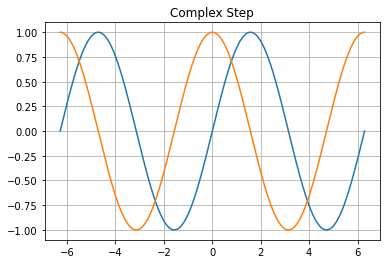

In [4]:
# complex step
def ComplxD(x0,h):
    D=np.imag(f(x0+1j*h))/h
    return D

D2=[]
x=np.linspace(-2*pi,2*pi,N)
for i in range(N):    
    d=ComplxD(x[i],10**(-10))
    D2.append(d)

plt.plot(x,f(x))
plt.plot(x,D2)
plt.grid()
plt.title('Complex Step')
plt.show()

We can perform the same analysis as before to find something quite interesting.

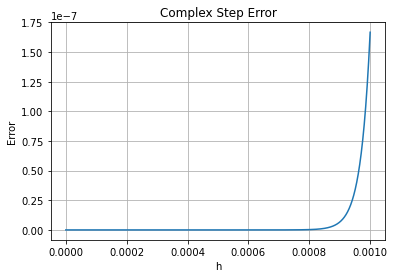

In [5]:
X=pi
G=np.linspace(-3,-10,N)
h=np.linspace(10**(-3),10**(-10),N)
E=[]
for i in range(N):    
    E.append(np.abs(np.cos(X)-ComplxD(X,10**G[i])))

plt.plot(h,E)
plt.grid()
plt.title('Complex Step Error')
plt.ylabel('Error')
plt.xlabel('h')
plt.show()

Here there is no spike in error as the step size decreases. This is due to the quadratic dependance the error has on the step size. This is not prevelent in the finite step method.

### Generalizing the Complex Step Method to Higher Dimensions 

If we however require a derivative past the first, we can not use either of these simple methods. For the higher order derivatives we consider what is known as Cauchy’s Integral Formula, given by the following 

$$f^{(n)}(z_0)=\frac{n!}{2\pi i}\oint_C \frac{f(z)}{(z-z_0)^{n+1}}dz$$

Using this method is a bit more involved but allows for derivatives of higher dimensions. To implement it, a path integral must be performed at every point in which the derivative is calculated. This method, while handy, is quite time consuming. Consider the following as a means to implement it to our function:

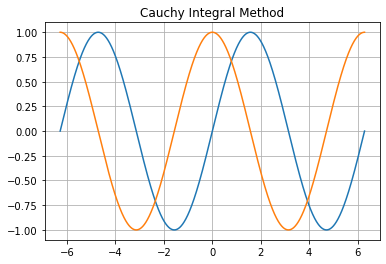

In [6]:
# Cauchy
def F(t,x0,n):
    z=x0*np.exp(1j*t)+x0
    zdot=x0*1j*np.exp(1j*t)
    F=f(z)/((z-x0)**(n+1))
    return F*zdot

def PathInt(x0,E,n):
    deltax = (2*pi-0)/E
    t=np.linspace(0,2*pi,E+1)
    I=F(t,x0,n)
    od=I[1:-1:2]
    ev=I[2:-1:2]
    A=I[0]+4*sum(od)+2*sum(ev)+I[-1]
    A=A*(2*pi-0)/(3*E)    
    return A

def CauchD(x0,E,n):    
    D=np.imag(PathInt(x0,E,n)/(2*pi))*np.math.factorial(n)
    return D

D3=[]
x=np.linspace(-2*pi,2*pi,N)
for i in range(N):    
    d=CauchD(x[i],10**4,1)
    D3.append(d)

plt.plot(x,f(x))
plt.plot(x,D3)
plt.grid()
plt.title('Cauchy Integral Method')
plt.show()

An important thing to note is that there is no step dependance on this method and instead the accuracy comes from the method of integration. Using Simpson’s rule for to numerically integrate the complex contour around our point of interest may not be sufficient for every function. However, It still proves quite convenient as a means of visualizing higher order derivatives

In [7]:
# playing with misc functions
def f(x):
    f=np.sin(x)**2/(x**2)
    return f
N=1000
x=np.linspace(-2*pi,2*pi,N)
D1=[]
for i in range(N):    
    d=CauchD(x[i],10**4,1)
    D1.append(d)    
D2=[]
for i in range(N):    
    d=CauchD(x[i],10**4,2)
    D2.append(d)
D3=[]
for i in range(N):    
    d=CauchD(x[i],10**4,3)
    D3.append(d)

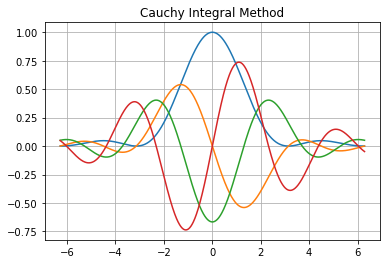

In [8]:
plt.plot(x,f(x))
plt.plot(x,D1)
plt.plot(x,D2)
plt.plot(x,D3)
plt.grid()
plt.title('Cauchy Integral Method')
#plt.ylim(-10,10)
#plt.xlim(-2*pi,2*pi)
plt.show()

### Conclusion 

Overall, each method serves its own unique purpose. Finite Step is a quick and easy method that can give general results of a functions behavior. Complex Step will give more accurate results but involves complex numbers. A point not really touched on is how this can be a large factor depending on the programming language you are using. Luckily, Python and NumPy are very well equipped when dealing with complex number computation. And finally, there is the Cauchy Integral method which serves the purpose of finding the function behavior at higher derivatives. The accuracy and computation time on the Cauchy Integral method lies heavily in the handling of complex numbers by the language of choice, and the implementation of integration. Here is a small demonstration of how quickly each method can calculate the derivative at a single point:

In [9]:
def f(x):
    f=np.sin(x)
    return f
X=pi

%timeit FinD(X,10**(-10))
%timeit ComplxD(X,10**(-10))
%timeit CauchD(X,10**6,1)

2.61 µs ± 14.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.42 µs ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
437 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
